In [74]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

In [13]:
df = pd.read_csv('creditcard.csv')

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.shape

(284807, 31)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
df['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

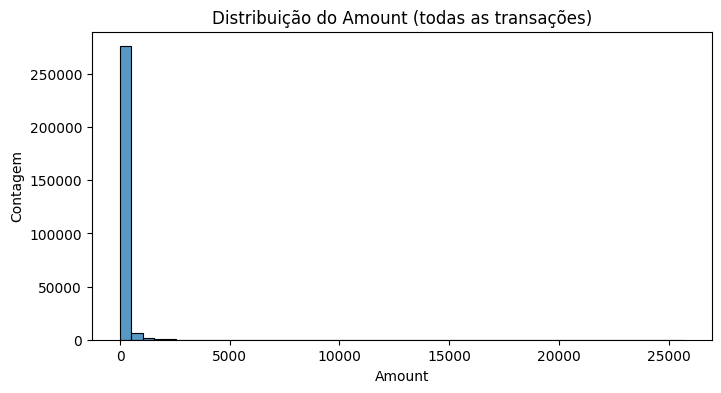

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=False)
plt.title('Distribuição do Amount (todas as transações)')
plt.xlabel('Amount')
plt.ylabel('Contagem')
plt.show()

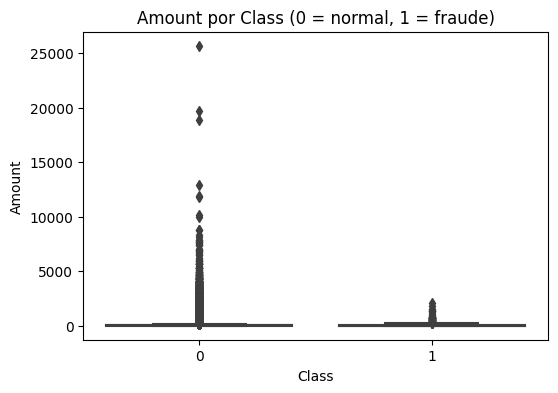

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount por Class (0 = normal, 1 = fraude)')
plt.show()

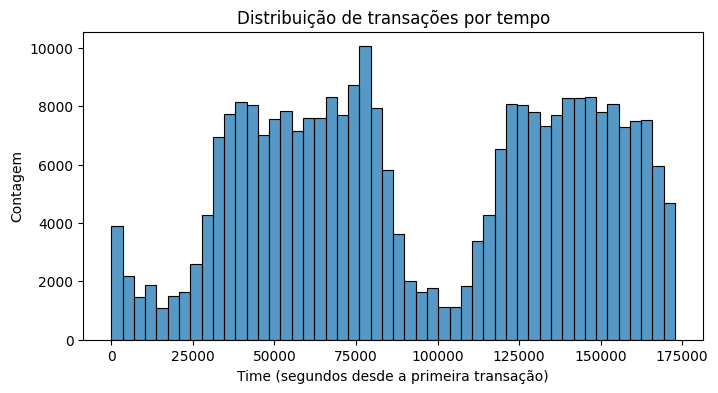

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(df['Time'], bins=50, kde=False)
plt.title('Distribuição de transações por tempo')
plt.xlabel('Time (segundos desde a primeira transação)')
plt.ylabel('Contagem')
plt.show()

Time: as transações não acontecem de forma uniforme; há janelas com muito mais operações, o que pode representar horários de pico de uso do cartão.
​

Amount (todas as transações): a maioria esmagadora das operações é de valor baixo, com poucos outliers muito altos, o que é típico em dados financeiros.
​

Amount por Class: fraudes (classe 1) parecem ter valores dentro de uma faixa semelhante às transações normais, então só o valor da transação não deve ser suficiente para separar muito bem fraude de não fraude.

In [29]:
X = df.drop('Class', axis=1)
y = df['Class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y #Mantém a proporção de classes no conjunto de treino e teste
)

X_train.shape, X_test.shape, y_train.value_counts(normalize=True) * 100, y_test.value_counts(normalize=True) * 100

((227845, 30),
 (56962, 30),
 Class
 0    99.827075
 1     0.172925
 Name: proportion, dtype: float64,
 Class
 0    99.827955
 1     0.172045
 Name: proportion, dtype: float64)

In [33]:
# Modelo baseline
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(X_train, y_train)

y_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

ROC AUC: 0.9712275368081953

Classification report:
               precision    recall  f1-score   support

           0     0.9999    0.9613    0.9802     56864
           1     0.0393    0.9184    0.0754        98

    accuracy                         0.9613     56962
   macro avg     0.5196    0.9398    0.5278     56962
weighted avg     0.9982    0.9613    0.9787     56962


Confusion matrix:
 [[54665  2199]
 [    8    90]]


ROC AUC ≈ 0,97: o modelo separa bem fraudes de não fraudes em termos de ranking de probabilidade.
​

Classe 1 (fraude):  recall ≈ 0,92 → ele encontra a maior parte das fraudes.

precision ≈ 0,04 → muitos falsos positivos (transactions normais marcadas como fraude).
​

Matriz de confusão:

    90 fraudes corretas, 8 fraudes perdidas.

    2.199 transações normais marcadas como fraude

In [ ]:
# Calcula curva precision-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

for thresh in [0.5, 0.3, 0.2, 0.1]:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"\n=== limiar = {thresh} ===")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_thresh))
    print(classification_report(y_test, y_pred_thresh, digits=4))


=== limiar = 0.5 ===
Confusion matrix:
 [[54665  2199]
 [    8    90]]
              precision    recall  f1-score   support

           0     0.9999    0.9613    0.9802     56864
           1     0.0393    0.9184    0.0754        98

    accuracy                         0.9613     56962
   macro avg     0.5196    0.9398    0.5278     56962
weighted avg     0.9982    0.9613    0.9787     56962


=== limiar = 0.3 ===
Confusion matrix:
 [[51444  5420]
 [    7    91]]
              precision    recall  f1-score   support

           0     0.9999    0.9047    0.9499     56864
           1     0.0165    0.9286    0.0324        98

    accuracy                         0.9047     56962
   macro avg     0.5082    0.9166    0.4912     56962
weighted avg     0.9982    0.9047    0.9483     56962


=== limiar = 0.2 ===
Confusion matrix:
 [[47341  9523]
 [    6    92]]
              precision    recall  f1-score   support

           0     0.9999    0.8325    0.9086     56864
           1     0.00

Quanto menor o limiar, mais agressivo. Encontra quase todas fraudes, mas marca muitas transações normais como suspeitas.
​

Random Forest Classifier:

In [40]:
rf = RandomForestClassifier(
    n_estimators=100, #Número de árvores na floresta. 100 é um bom valor padrão - mais árvores geralmente melhoram performance, mas aumentam tempo de treino
    class_weight='balanced', #Ajusta automaticamente os pesos das classes proporcionalmente ao inverso da frequência (dá mais peso à classe rara/fraude). Essencial pro desbalanceamento 99,8% vs 0,2%
    random_state=42, #Seed fixa pra reprodutibilidade. Sempre o mesmo 42 gera os mesmos splits e resultados, facilitando comparações entre modelos
    n_jobs=-1 #Usa todos os núcleos da CPU em paralelo. Acelera muito o treino (especialmente com 100 árvores), sem perda de qualidade.
)

rf.fit(X_train, y_train)

# Previsões
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict(X_test)

In [38]:
print("ROC AUC RF:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification report RF:\n", classification_report(y_test, y_pred_rf, digits=4))
print("\nConfusion matrix RF:\n", confusion_matrix(y_test, y_pred_rf))

ROC AUC RF: 0.952908497036969

Classification report RF:
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962


Confusion matrix RF:
 [[56861     3]
 [   25    73]]


| Modelo       | ROC AUC | Recall Fraude | Precision Fraude | Fraudes Perdidas | Falsos Positivos |
| ------------ | ------- | ------------- | ---------------- | ---------------- | ---------------- |
| LogReg (0.5) | 0.971   | 91,8%         | 3,9%             | 8                | 2.199            |
| RF (0.5)     | 0.953   | 74,5%         | 96,1%            | 25               | 3                |

RF é mais preciso (96% vs 4%) e tem poucos falsos positivos (3), mas perde mais fraudes (25 vs 8).
​

LogReg é mais sensível (acha mais fraudes, mas com muitos falsos alarmes).
​

XGBOOST:

In [42]:
# Calcular scale_pos_weight para desbalanceamento (negativos/positivos)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"scale_pos_weight calculado: {scale_pos_weight:.2f}")

scale_pos_weight calculado: 577.29


In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200, #Número de árvores (boosting rounds). 200 é bom meio-termo entre performance e velocidade
    learning_rate=0.1, #Velocidade de aprendizado ("shrinkage"). 0.1 é padrão conservador - menor = mais lento mas generaliza melhor.
    max_depth=6, #Profundidade máxima das árvores. 6 permite capturar interações complexas sem overfitting extremo.
    scale_pos_weight=scale_pos_weight,#Peso da classe positiva (fraude). Calculado como negativos/positivos (~578 no seu caso) para equilibrar o desbalanceamento 99,8% vs 0,2%. Cada erro em fraude "custa" 578x mais.
    random_state=42, #Seed fixa para reprodutibilidade (igual ao RF)
    n_jobs=-1, #Usa todos os núcleos da CPU em paralelo (acelera treino)
    eval_metric='aucpr'  # AUC-PR boa para desbalanceamento
)

Esses parâmetros fazem o XGBoost ser otimizado para fraude: lida com desbalanceamento via scale_pos_weight, monitora performance na classe rara via aucpr, e previne overfitting via early_stopping.

In [44]:
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=20,
    verbose=10
)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.44931
[10]	validation_0-aucpr:0.60020
[20]	validation_0-aucpr:0.70514
[30]	validation_0-aucpr:0.71630
[40]	validation_0-aucpr:0.79988
[50]	validation_0-aucpr:0.80920
[60]	validation_0-aucpr:0.83606
[70]	validation_0-aucpr:0.85170
[80]	validation_0-aucpr:0.85670
[90]	validation_0-aucpr:0.86365
[100]	validation_0-aucpr:0.86508
[110]	validation_0-aucpr:0.86588
[120]	validation_0-aucpr:0.86482
[130]	validation_0-aucpr:0.86885
[140]	validation_0-aucpr:0.87140
[150]	validation_0-aucpr:0.87450
[160]	validation_0-aucpr:0.87482
[170]	validation_0-aucpr:0.87596
[180]	validation_0-aucpr:0.87644
[190]	validation_0-aucpr:0.87722
[199]	validation_0-aucpr:0.87863


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [45]:
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)

In [46]:
print("ROC AUC XGBoost:", roc_auc_score(y_test, y_proba_xgb))
print("\nClassification report XGBoost:\n", classification_report(y_test, y_pred_xgb, digits=4))
print("\nConfusion matrix XGBoost:\n", confusion_matrix(y_test, y_pred_xgb))

ROC AUC XGBoost: 0.9683850045364235

Classification report XGBoost:
               precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8817    0.8367    0.8586        98

    accuracy                         0.9995     56962
   macro avg     0.9407    0.9183    0.9292     56962
weighted avg     0.9995    0.9995    0.9995     56962


Confusion matrix XGBoost:
 [[56853    11]
 [   16    82]]


| Modelo       | ROC AUC | Recall Fraude | Precision Fraude | Fraudes Perdidas | Falsos Positivos |
| ------------ | ------- | ------------- | ---------------- | ---------------- | ---------------- |
| LogReg (0.5) | 0.971   | 91,8%         | 3,9%             | 8                | 2.199            |
| RF           | 0.953   | 74,5%         | 96,1%            | 25               | 3                |
| XGBoost      | 0.968   | 83,7%         | 88,2%            | 16               | 11               |

Melhor trade-off:

Precision muito alta (88%) com recall bom (84%). Poucos falsos positivos (11) e poucas fraudes perdidas (16). AUC excelente (0.968).

O scale_pos_weight e early_stopping fizeram a diferença!

ANN:

In [48]:
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights calculados: {class_weight_dict}")

Class weights calculados: {0: 0.5008661206149896, 1: 289.14340101522845}


In [50]:
# Padronizar features (importante pra ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ann_model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(30,)),#1ª camada densa: 256 neurônios, ReLU (ativa valores >0), recebe 30 features (V1-V28 + Time + Amount).
    keras.layers.BatchNormalization(), #Normaliza ativações da camada anterior (média=0, desvio=1) durante o treino. Estabiliza gradientes, acelera convergência.
    keras.layers.Dropout(0.4), #Dropout 40%: randomicamente "desliga" 40% dos neurônios em cada batch. Previne overfitting.
    keras.layers.Dense(128, activation='relu'), #2ª camada densa: reduz pra 128 neurônios, continua aprendendo padrões mais abstratos com ReLU
    keras.layers.BatchNormalization(), #Normaliza novamente as ativações da 2ª camada. Mantém estabilidade em redes profundas.
    keras.layers.Dropout(0.3), #Dropout 30%: menos dropout que a 1ª (0.4→0.3), pois estamos em camadas mais profundas.
    keras.layers.Dense(64, activation='relu'), #3ª camada densa: 64 neurônios, ainda mais abstrata (padrões complexos de fraude).
    keras.layers.Dense(1, activation='sigmoid') #Camada de saída: 1 neurônio + sigmoid (0 a 1). Probabilidade de ser fraude (0=normal, 1=fraude).
])

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(
    optimizer='adam', #Adam optimizer: Algoritmo adaptativo que ajusta learning rate por parâmetro. Combina momentum + RMSProp. Melhor pra maioria dos casos.
    loss='binary_crossentropy', #Binary Crossentropy: Função de perda pra classificação binária (0=normal, 1=fraude). Penaliza mais previsões erradas confiantes.
    metrics=['AUC', 'Precision', 'Recall']
)

In [77]:
early_stopping = EarlyStopping(
    monitor='val_AUC',
    patience=15,
    restore_best_weights=True
)

In [78]:
y_train_np = y_train.values.astype(np.float32)
history = ann_model.fit(
    X_train_scaled, y_train.values.astype(np.float32),
    epochs=20,
    batch_size=512,      # ← 512 em vez de 2048
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.9296 - Precision: 0.0117 - Recall: 0.8794 - loss: 0.3507 - val_AUC: 0.9709 - val_Precision: 0.0427 - val_Recall: 0.9157 - val_loss: 0.1556
Epoch 2/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - AUC: 0.9838 - Precision: 0.0349 - Recall: 0.9180 - loss: 0.1621 - val_AUC: 0.9904 - val_Precision: 0.0454 - val_Recall: 0.9277 - val_loss: 0.1384
Epoch 3/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.9867 - Precision: 0.0343 - Recall: 0.9349 - loss: 0.1350 - val_AUC: 0.9902 - val_Precision: 0.0731 - val_Recall: 0.9157 - val_loss: 0.0751
Epoch 4/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.9840 - Precision: 0.0318 - Recall: 0.9319 - loss: 0.1461 - val_AUC: 0.9873 - val_Precision: 0.0534 - val_Recall: 0.9157 - val_loss: 0.1450
Epoch 5/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - AUC: 0.9747 - Precision: 0.0317 - Recall: 0.9393 - loss: 0.1274 - val_AUC: 0.9846 - val_Precision: 0.0723 - val_Recall: 0.9036 - val_loss: 0.0703


In [79]:
y_proba_ann = ann_model.predict(X_test_scaled, verbose=0).ravel()
y_pred_ann = (y_proba_ann > 0.5).astype(int)

In [80]:
print("ROC AUC ANN:", roc_auc_score(y_test, y_proba_ann))
print("\nClassification report ANN:\n", classification_report(y_test, y_pred_ann, digits=4))
print("\nConfusion matrix ANN:\n", confusion_matrix(y_test, y_pred_ann))

ROC AUC ANN: 0.9737856453780163

Classification report ANN:
               precision    recall  f1-score   support

           0     0.9998    0.9847    0.9922     56864
           1     0.0899    0.8776    0.1630        98

    accuracy                         0.9845     56962
   macro avg     0.5448    0.9311    0.5776     56962
weighted avg     0.9982    0.9845    0.9908     56962


Confusion matrix ANN:
 [[55993   871]
 [   12    86]]


| Modelo  | ROC AUC | Recall Fraude | Precision Fraude | Falsos Positivos | Fraudes Perdidas | Impacto no Negócio                                                                                                                                                                    |
| ------- | ------- | ------------- | ---------------- | ---------------- | ---------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| ANN     | 0.974   | 87,8%         | 9,0%             | 871              | 12               | Muitos falsos positivos geram alto volume de investigações desnecessárias e insatisfação de clientes legítimos, sobrecarregando equipes de análise, apesar de poucas fraudes perdidas |
| XGBoost | 0.968   | 83,7%         | 88,2%            | 11               | 16               | Poucos falsos positivos minimizam interrupções para clientes legítimos e otimizam eficiência operacional, com perdas de fraude aceitáveis                                             |
| LogReg  | 0.971   | 91,8%         | 3,9%             | 2.199            | 8                | Falsos positivos excessivos tornam o modelo operacionalmente inviável devido ao volume insustentável de análises manuais, mas minimiza fraudes perdidas                               |
| RF      | 0.953   | 74,5%         | 96,1%            | 3                | 25               | Poucos falsos positivos mas maior exposição ao risco por deixar passar 25 fraudes, comprometendo segurança financeira                                                                 |